In [1]:
import re
import sys
import cv2
import time
import numpy as np
from PIL import Image
from IPython import display

def ld():
    return open("17.txt").read()
def td():
    return ">>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>"

pcs=[]
pcs.append("####")
pcs.append(" # \n###\n # ")
pcs.append("###\n  #\n  #")
pcs.append("#\n#\n#\n#")
pcs.append("##\n##")
        
def getPiece(n):
    global pcs
    
    r={}
    for y,l in enumerate(pcs[n].split('\n')):
        for x,c in enumerate(l):
            if c=='#':
                r[(x,y)]=1
    return r


def height(p):
    h=0
    for x,y in p.keys():
        if y>h:
            h=y
    return h+1

        

class TT:
    def __init__(s,I):
        s.M={}
        s.piece=0
        s.I=I
        s.ix=0
        
    def highest(s):
        Y=[]
        for x,y in s.M.keys():
            Y.append(y)
        if len(Y)==0:
            return -1
        return max(Y)
    
    def update(s, draw=True):
        #spawn a piece
        #let it fall while 
        #eating input
        
        p=getPiece(s.piece)
        
        x=2
        y=s.highest()+4
        
        if draw:
            s.pretty(p, x, y, s.piece)
        
        while 1:
            inp=s.I[s.ix]
            s.ix=(s.ix+1)%len(s.I)
            
            assert(inp == '<' or inp == '>')           
            dx=1 if inp=='>' else -1            
            assert(dx == 1 or dx == -1)
            
            #sideways
            for xx,yy in p.keys():
                xxx=x+xx+dx
                yyy=y+yy
                #if hit walls or collid old pieces
                if xxx<0 or xxx >=7 or (xxx,yyy) in s.M:
                    dx=0
                    break
            #print(dx)
            x+=dx
            
            #down
            dy=-1
            for xx,yy in p.keys():
                xxx=x+xx
                yyy=y+yy+dy
                if yyy < 0 or (xxx,yyy) in s.M:
                    dy=0
                    break
            
            if dy==0:
                for xx,yy in p.keys():
                    xxx=x+xx
                    yyy=y+yy
                    s.M[(xxx,yyy)]=s.piece
                break
            y+=dy
            
            if draw:
                s.pretty(p, x, y, s.piece)
        
        if draw:
            s.pretty(p, x, y, s.piece)
        global pcs
        s.piece=(s.piece+1)%len(pcs)
        
    
    
    def pretty(s, p, xx, yy, ft):
        #return
        C=[[255,0,0],[0,255,0],[0,0,255],[255,0,255],[255,255,0],[0,255,255]]
        w=7
        h=height(s.M) + 3 + 4
        pix = np.zeros([h,w,3]).astype(np.ubyte)
        for x,y in s.M.keys():
            pix[y,x,:]=C[s.M[(x,y)]]
    
        for x,y in p.keys():
            xxx = xx + x
            yyy = yy + y
            pix[yyy,xxx,:]=C[ft]
    
    
        pix = cv2.flip(pix, 0)
        
        pix = pix[:20,:,:]
    
        F=8
        pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)    
        display.clear_output(wait=True)    
        display.display(Image.fromarray(pix, 'RGB'))
        #time.sleep(0.1)
    
    def sig(s):
        r=""
        h=s.highest()+1
        for y in range(300):
            for x in range(7):
                if (x,h) in s.M:
                    r+='#'
                else:
                    r+=' '
            h-=1
            r+='\n'
        r+=','+str(s.ix)
        r+=','+str(s.piece)
        return r
                
        


def p1(N,I,draw=0):
    t=TT(I)
    for j in range(N):
        t.update(draw)
    return t.highest()+1

print("test1:",p1(2022,td()),3068)
print("part1:",p1(2022,ld()),3168)



test1: 3068 3068
part1: 3168 3168


In [2]:
N=1_000_000_000_000

def p2(N,I,draw=0):
    t=TT(I)
    M={}
    H={}
    for j in range(N):
        t.update(draw)
        
        s=t.sig()
        h=t.highest()+1
        
        if s in M:
            #print(s)
            j0=M[s]
            h0=H[j0]
            
            #print("djv %d to %d (%d)"%(j,j0,j-j0))
            
            dj=j-j0
            dh=h-h0
            
            #N is one indexed
            #j is zero indexed
            #only found the -1 via testcases
            N0=N-j0-1
            
            
            b=N0%dj
            a=int((N0-b)/dj)
            
            #return h0+a*dh+H[j0+b]-h0
            return H[j0+b]+a*dh
        H[j]=h                           
        M[s]=j
    return h

print("test1:",p2(2022,td()),3068)
print("part1:",p2(2022,ld()),3168)
print("test2:\n",p2(N,td()),"\n",1514285714288)
print("part2:\n",p2(N,ld()),"\n",1554117647070)



test1: 3068 3068
part1: 3168 3168
test2:
 1514285714288 
 1514285714288
part2:
 1554117647070 
 1554117647070


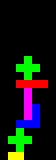

part1: 3168 3168


In [3]:
print("part1:",p1(2022,ld(),1),3168)
      


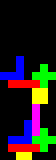

part2:
 1554117647070 
 1554117647070


In [4]:
print("part2:\n",p2(N,ld(),1),"\n",1554117647070)

      
      
